In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc


In [103]:
#Loading test features set data
test_sf= pd.read_csv('Data/test_set_features.csv')

In [104]:
#Examinig The First Five Rows
test_sf.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [105]:
# Examinig test features data types. 
test_sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26708 non-null  int64  
 1   h1n1_concern                 26623 non-null  float64
 2   h1n1_knowledge               26586 non-null  float64
 3   behavioral_antiviral_meds    26629 non-null  float64
 4   behavioral_avoidance         26495 non-null  float64
 5   behavioral_face_mask         26689 non-null  float64
 6   behavioral_wash_hands        26668 non-null  float64
 7   behavioral_large_gatherings  26636 non-null  float64
 8   behavioral_outside_home      26626 non-null  float64
 9   behavioral_touch_face        26580 non-null  float64
 10  doctor_recc_h1n1             24548 non-null  float64
 11  doctor_recc_seasonal         24548 non-null  float64
 12  chronic_med_condition        25776 non-null  float64
 13  child_under_6_mo

In [106]:
test_sf.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26708.000000,26623.000000,26586.000000,26629.000000,26495.000000,26689.000000,26668.000000,26636.000000,26626.000000,26580.000000,...,25919.000000,14480.000000,26310.000000,26328.000000,26333.000000,26256.000000,26209.000000,26187.000000,26483.000000,26483.000000
mean,40060.500000,1.623145,1.266042,0.049645,0.729798,0.069279,0.826084,0.351517,0.337227,0.683747,...,0.111501,0.887914,3.844622,2.326838,2.360612,4.024832,2.708688,2.143392,0.894310,0.543745
std,7710.079831,0.902755,0.615617,0.217215,0.444072,0.253934,0.379045,0.477453,0.472772,0.465022,...,0.314758,0.315483,1.007570,1.275636,1.359413,1.083204,1.376045,1.339102,0.754244,0.935057
min,26707.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,33383.750000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,40060.500000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,46737.250000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,53414.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


In [107]:
#Loading train features set data
train_sf= pd.read_csv('Data/training_set_features.csv')

In [108]:
#Examinig The First Five Row
train_sf.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [109]:
# Examinig data types. 
train_sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [110]:
train_sf.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


In [111]:
# Loading Train Labels Data Set
train_labels= pd.read_csv('Data/training_set_labels.csv')

In [112]:
# Examining The First Five Rows
train_labels.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [113]:
# Examinig data types. 
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


In [114]:
train_labels.describe()

,respondent_id,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26707.000000,26707.000000
mean,13353.000000,0.212454,0.465608
std,7709.791156,0.409052,0.498825
min,0.000000,0.000000,0.000000
25%,6676.500000,0.000000,0.000000
50%,13353.000000,0.000000,0.000000
75%,20029.500000,0.000000,1.000000
max,26706.000000,1.000000,1.000000


In [115]:
# Creating the training data set
train = pd.merge(train_labels, train_sf, on='respondent_id')

In [116]:
# Examining The First Five Rows
train.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,0,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,0,0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,0,1,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,0,0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [117]:
test_sf.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [118]:
# Examining the tatgets: h1n1_vaccine and seasonal_vaccine.

# Print value counts for 'h1n1_vaccine' column
print("Value Counts for 'h1n1_vaccine':")
print(train['h1n1_vaccine'].value_counts())

# Print value counts for 'seasonal_vaccine' column
print("\nValue Counts for 'seasonal_vaccine':")
print(train['seasonal_vaccine'].value_counts())

Value Counts for 'h1n1_vaccine':
0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

Value Counts for 'seasonal_vaccine':
0    14272
1    12435
Name: seasonal_vaccine, dtype: int64


### We are interested in seasonal_vaccine to predict whether individuals will take the seasonal flu vaccine.

In [119]:
# Checking For Missing Values In The Training Set
missing_values = train.isnull().sum()
missing_values

respondent_id                      0
h1n1_vaccine                       0
seasonal_vaccine                   0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
s

In [120]:
# Dropping 'employment_industry' and 'employment_occupation' columns
train= train.drop(columns=['employment_industry', 'employment_occupation'])

# Replacing NaN values in 'health_insurance' with zero
train['health_insurance'].fillna(0, inplace=True)

In [121]:
train.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,...,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0
1,1,0,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0
2,2,0,0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0
3,3,0,1,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0
4,4,0,0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0


### Handling Categorical Variables In The Training Data Set
We Will use One-Hot Encoding Methode to create binary columns for each category, where each column represents the presence or absence of a category.

In [132]:
# Getting the list of columns with string data types in the 'train' DataFrame
train_string_columns = train.select_dtypes(include=['object']).columns.tolist()
train_string_columns 

[]

In [133]:
# Apply one-hot encoding to the categorical columns
train = pd.get_dummies(train, columns = train_string_columns)
train.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,...,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA
0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,1
1,1,0,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0
2,2,0,0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,1,0,0
3,3,0,1,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,0,1,0,0,0,0,0,1,0
4,4,0,0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,0,0,0,0,0,1,1,0,0


In [139]:
def build_logistic_regression_model(data):
    # Separate the target variable (seasonal_vaccine) from the features
    X = data.drop(columns=['seasonal_vaccine'])
    y = data['seasonal_vaccine']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # Handle missing values using SimpleImputer
    imputer = SimpleImputer(strategy='mean')
    X_train = imputer.fit_transform(X_train)
    X_test = imputer.transform(X_test)

    # Standardize the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Instantiate the logistic regression model
    logistic_model = LogisticRegression(random_state=42)

    # Fit the model to the training data
    logistic_model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = logistic_model.predict(X_test)

    # Calculate accuracy and print classification report
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    return logistic_model, accuracy, classification_rep, X, y, X_train, X_test, y_train, y_test


logistic_model, accuracy, classification_rep,X, y, X_train, X_test, y_train, y_test = build_logistic_regression_model(train)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)



Accuracy: 0.8060506215366182
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.82      3634
           1       0.80      0.77      0.78      3043

    accuracy                           0.81      6677
   macro avg       0.81      0.80      0.80      6677
weighted avg       0.81      0.81      0.81      6677



##### The logistic regression model for predicting seasonal flu vaccine is performing reasonably well. It achieves an accuracy of around 80.68%, meaning it correctly predicts vaccination status for a significant portion of the dataset. The model has good precision and recall for both those who take the vaccine (class 1) and those who don't (class 0), with F1-scores of approximately 0.78 and 0.83, respectively. These results suggest that the model shows promise for predicting vaccine uptake.

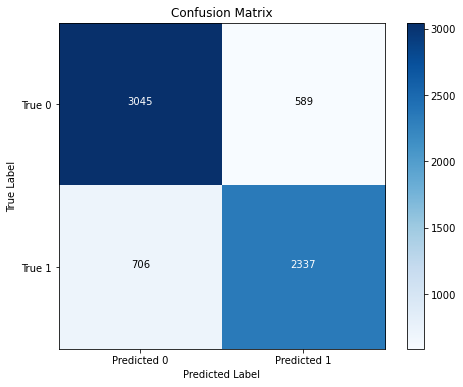

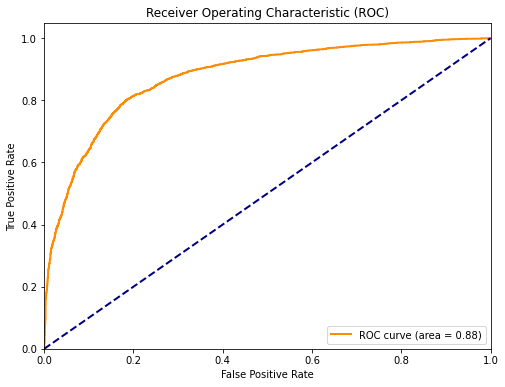

In [140]:
#Making predictions
y_pred = logistic_model.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Predicted 0', 'Predicted 1'])
plt.yticks([0, 1], ['True 0', 'True 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

for i in range(2):
    for j in range(2):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')

plt.show()

# Calculate ROC curve
y_pred_prob = logistic_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


In [147]:
def build_logistic_regression_model(data):
    # Separate the target variable (seasonal_vaccine) from the features
    X = data[[column for column in data if "behavioral" in column] + ['doctor_recc_h1n1' ,'doctor_recc_seasonal']]
    y = data['seasonal_vaccine']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # Handle missing values using SimpleImputer
    imputer = SimpleImputer(strategy='mean')
    X_train = imputer.fit_transform(X_train)
    X_test = imputer.transform(X_test)

    # Standardize the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Instantiate the logistic regression model
    logistic_model = LogisticRegression(random_state=42)

    # Fit the model to the training data
    logistic_model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = logistic_model.predict(X_test)

    # Calculate accuracy and print classification report
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    return logistic_model, accuracy, classification_rep, X, y, X_train, X_test, y_train, y_test


logistic_model, accuracy, classification_rep,X, y, X_train, X_test, y_train, y_test = build_logistic_regression_model(train)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)



Accuracy: 0.677400029953572
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.82      0.73      3634
           1       0.70      0.51      0.59      3043

    accuracy                           0.68      6677
   macro avg       0.68      0.66      0.66      6677
weighted avg       0.68      0.68      0.67      6677



In [145]:
train[[column for column in train if "behavioral" in column] + ['doctor_recc_h1n1' ,'doctor_recc_seasonal']]

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
26702,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
26703,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
26704,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
26705,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0


### Decision Treee

In [129]:
# Making copies of the data
X_train = X.copy()
y_train = y.copy()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Handle missing values in numerical features with median
numerical_features = X_train.select_dtypes(exclude=['object']).columns
numerical_imputer = SimpleImputer(strategy='median')
X_train.loc[:, numerical_features] = numerical_imputer.fit_transform(X_train.loc[:, numerical_features])
X_test.loc[:, numerical_features] = numerical_imputer.transform(X_test.loc[:, numerical_features])

# Handle missing values in categorical features with mode (custom imputation)
categorical_features = X_train.select_dtypes(include=['object']).columns
for col in categorical_features:
    mode_value = X_train[col].mode()[0]
    X_train[col].fillna(mode_value, inplace=True)
    X_test[col].fillna(mode_value, inplace=True)

# Instantiate and fit the Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = decision_tree_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)


Accuracy: 0.7100494233937397
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.72      0.73      3634
           1       0.68      0.70      0.69      3043

    accuracy                           0.71      6677
   macro avg       0.71      0.71      0.71      6677
weighted avg       0.71      0.71      0.71      6677



##### The decision tree model achieved an accuracy of around 71.00% in predicting seasonal influenza vaccination status. While it performed reasonably well, it exhibited slightly lower precision and recall compared to the logistic regression model, resulting in F1-scores of approximately 0.73 for non-vaccinated cases and 0.69 for vaccinated cases. This indicates that the decision tree model has room for improvement in correctly identifying individuals who received the seasonal vaccine and reducing false negatives. Fine-tuning and feature engineering may enhance its performance.

### Random Forest Classifie

In [130]:
# Make deep copies of the data
X_train = X.copy()
y_train = y.copy()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Handle missing values in numerical features with median
numerical_features = X_train.select_dtypes(exclude=['object']).columns
numerical_imputer = SimpleImputer(strategy='median')
X_train.loc[:, numerical_features] = numerical_imputer.fit_transform(X_train.loc[:, numerical_features])
X_test.loc[:, numerical_features] = numerical_imputer.transform(X_test.loc[:, numerical_features])

# Handle missing values in categorical features with mode (custom imputation)
categorical_features = X_train.select_dtypes(include=['object']).columns
for col in categorical_features:
    mode_value = X_train[col].mode()[0]
    X_train[col].fillna(mode_value, inplace=True)
    X_test[col].fillna(mode_value, inplace=True)

# Instantiate and fit the Random Forest Classifier
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = random_forest_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)


Accuracy: 0.8054515500973491
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      3634
           1       0.79      0.77      0.78      3043

    accuracy                           0.81      6677
   macro avg       0.80      0.80      0.80      6677
weighted avg       0.81      0.81      0.81      6677



##### The Random Forest Classifier achieved an accuracy of around 80.55%, indicating it correctly predicted individuals' seasonal vaccine uptake status nearly 81% of the time. This model demonstrated a well-balanced performance, with precision of approximately 81% for those not taking the vaccine and 79% for those taking it. It also displayed good recall rates of 83% for non-vaccine takers and 77% for vaccine takers. The F1-scores of 82% for non-takers and 78% for takers highlight its effectiveness in providing a harmonious trade-off between precision and recall for both groups. In summary, the Random Forest Classifier performs well in predicting seasonal vaccine behavior based on the available data.

These results show that the Logistic Regression and Random Forest models have very similar accuracy and classification report metrics, while the Decision Tree model has slightly lower accuracy and F1-scores. The Logistic Regression and Random Forest models appear to be more balanced in terms of precision and recall for both classes, as indicated by their F1-scores.